https://www.geeksforgeeks.org/k-nearest-neighbours/

https://medium.com/@rizwanayasmeen06/k-nearest-neighbor-knn-algorithm-in-machine-learning-d38d9638d7e0

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
sns.set_theme()
sns.set_style('whitegrid')
sns.set_palette(['#3F7C85', '#FF5F5D', '#00CCBF', '#72F2EB', '#747E7E'])

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Summary statistics and information about the dataset


heart_data = pd.read_csv('/content/drive/MyDrive/Dataset Files/heart (1).csv')

data_info = heart_data.info()
summary_statistics = heart_data.describe()

data_info, summary_statistics


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


(None,
               age         sex          cp      trtbps        chol         fbs  \
 count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
 mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
 std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
 min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
 25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
 50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
 75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
 max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   
 
           restecg    thalachh        exng     oldpeak         slp         caa  \
 count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
 mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
 std   

In [4]:
heart_data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


###### Columns Explained

age - Age of the patient

sex - Sex of the patient

cp - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

trtbps - Resting blood pressure (in mm Hg)

chol - Cholestoral in mg/dl fetched via BMI sensor

fbs - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False

restecg - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

thalachh - Maximum heart rate achieved

oldpeak - Previous peak

slp - Slope

caa - Number of major vessels

thall - Thalium Stress Test result ~ (0,3)

exng - Exercise induced angina ~ 1 = Yes, 0 = No

output - Target variable

dict = {}:

This line initializes an empty dictionary called dict.
The dictionary will be used to store the unique counts of each column in the heart_data DataFrame.

for i in list(heart_data.columns)::

This line begins a for loop that iterates over each column name in the heart_data DataFrame.

heart_data.columns returns an index object containing the column names. Wrapping it with list() converts this index object into a list, so that the loop iterates over each column name as a string.

dict[i] = heart_data[i].value_counts().shape[0]:

For each column i, the code does the following:
heart_data[i] accesses the data in column i.

.value_counts() counts the number of occurrences of each unique value in that column and returns a Series object.

.shape[0] returns the number of unique values by counting the number of rows in the Series object.

dict[i] = ... assigns this unique count to the corresponding column name (i) as the key in the dictionary.

pd.DataFrame(dict, index=["unique count"]) creates a new DataFrame from the dictionary. The keys of the dictionary (column names) become the column names in the new DataFrame, and the values (unique counts) become the values in the DataFrame.

index=["unique count"] sets the index of the new DataFrame to "unique count", making it a one-row DataFrame.

.transpose() swaps the rows and columns of the DataFrame, so that each column name from heart_data is now a row, and the unique count is the corresponding value.

In [5]:
dict = {}
for i in list(heart_data.columns):
    dict[i] = heart_data[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


###### Exploratory Data Analysis

Univariate Analysis

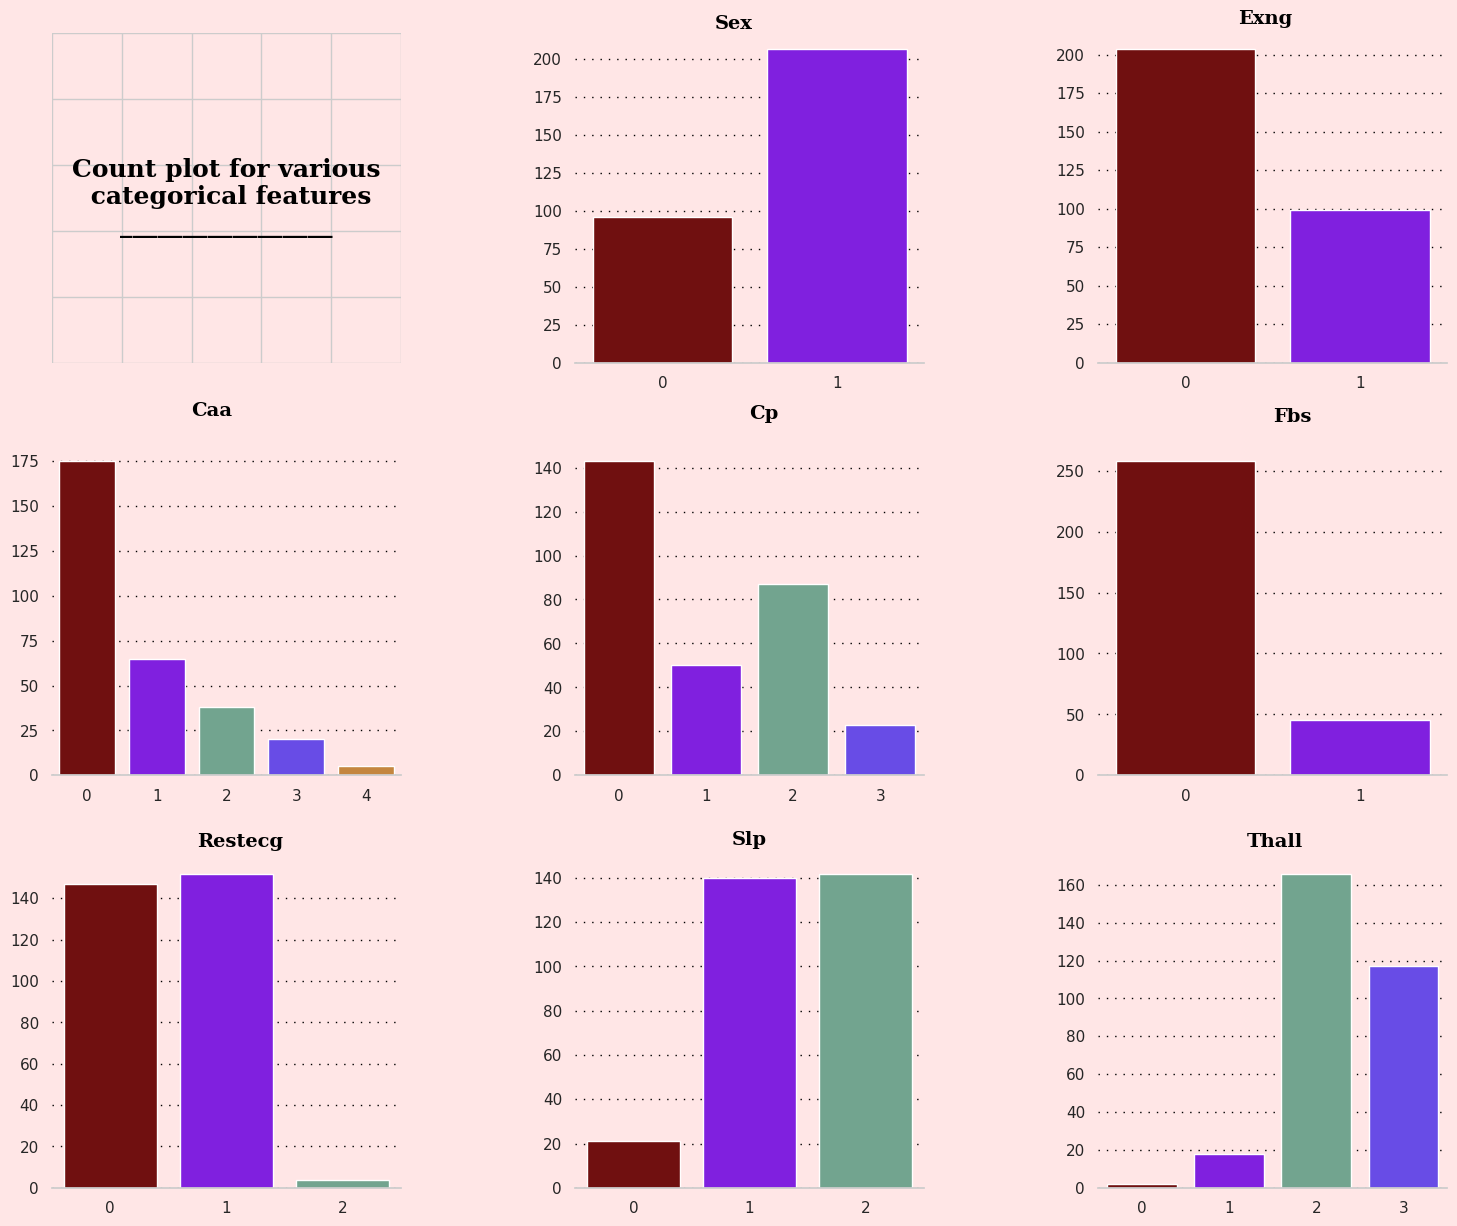

In [6]:
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color)
ax6.set_facecolor(background_color)
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Count plot for various\n categorical features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Sex count
ax1.text(0.3, 220, 'Sex', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=heart_data,x='sex',palette=color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Exng count
ax2.text(0.3, 220, 'Exng', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,data=heart_data,x='exng',palette=color_palette)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Caa count
ax3.text(1.5, 200, 'Caa', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=heart_data,x='caa',palette=color_palette)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Cp count
ax4.text(1.5, 162, 'Cp', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4,data=heart_data,x='cp',palette=color_palette)
ax4.set_xlabel("")
ax4.set_ylabel("")

# Fbs count
ax5.text(0.5, 290, 'Fbs', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=heart_data,x='fbs',palette=color_palette)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Restecg count
ax6.text(0.75, 165, 'Restecg', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax6,data=heart_data,x='restecg',palette=color_palette)
ax6.set_xlabel("")
ax6.set_ylabel("")

# Slp count
ax7.text(0.85, 155, 'Slp', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax7,data=heart_data,x='slp',palette=color_palette)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Thall count
ax8.text(1.2, 180, 'Thall', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax8,data=heart_data,x='thall',palette=color_palette)
ax8.set_xlabel("")
ax8.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)

###### Count plot of target

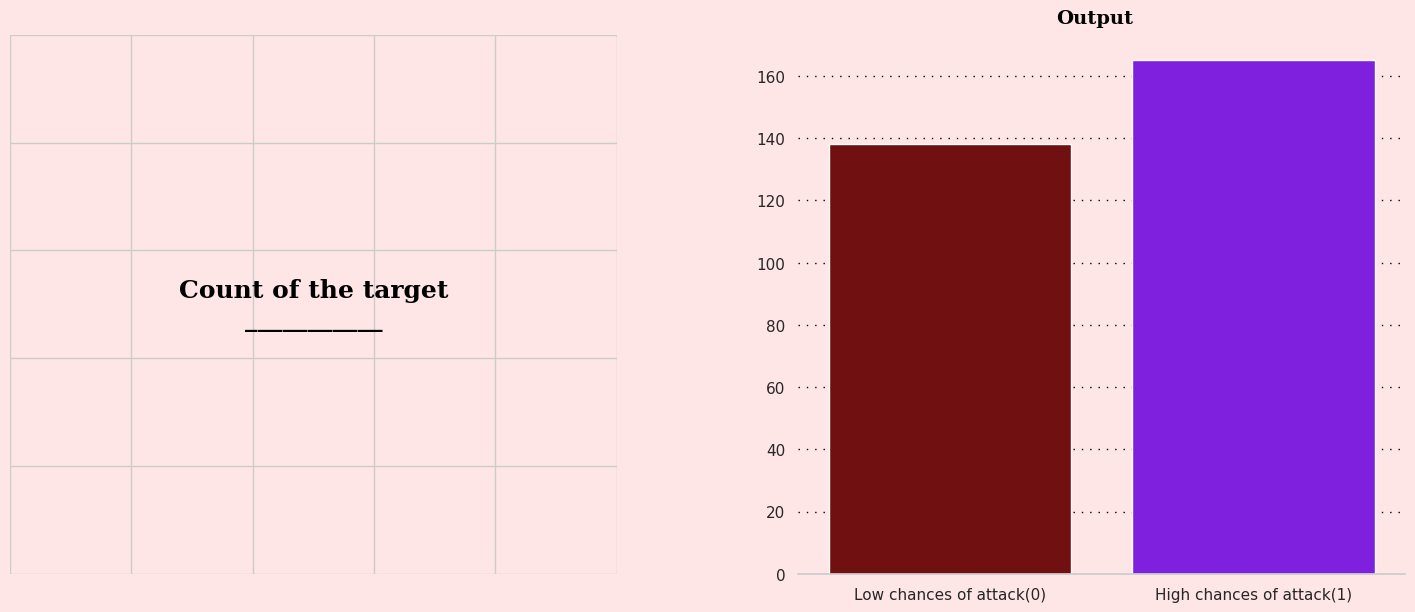

In [7]:
fig = plt.figure(figsize=(18,7))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)

# Title of the plot
ax0.text(0.5,0.5,"Count of the target\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Target Count
ax1.text(0.35,177,"Output",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1, data=heart_data, x = 'output',palette = color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels(["Low chances of attack(0)","High chances of attack(1)"])

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

##### Bivariate Analysis

In [8]:
df_corr = heart_data.corr().transpose()
df_corr

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


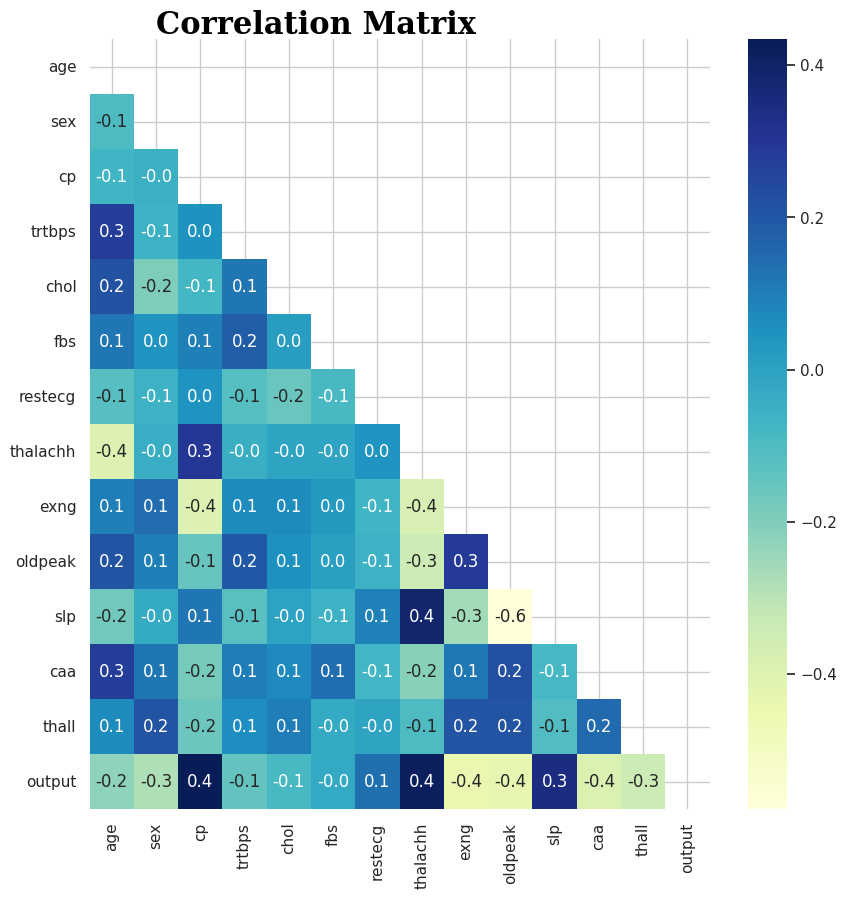

In [9]:
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])


color_palette = ["#5833ff","#da8829"]
mask = np.triu(np.ones_like(df_corr))
ax0.text(1.5,-0.1,"Correlation Matrix",fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
sns.heatmap(df_corr,mask=mask,fmt=".1f",annot=True,cmap='YlGnBu')
plt.show()

### Applying KNN Classifier

knn = KNeighborsClassifier(n_neighbors=5):

This line initializes an instance of the KNeighborsClassifier class, which is used for classification tasks.

n_neighbors=5 sets the number of neighbors to consider when making a prediction. In this case, the classifier will look at the 5 nearest neighbors to the data point being classified.

The KNN algorithm works by finding the "k" nearest data points (neighbors) in the training set to a given test data point and then making a prediction based on the majority class among those neighbors.

This line trains the KNN classifier on the training data.

X_train_scaled is the training data with features that have likely been scaled (normalized or standardized) to ensure that each feature contributes equally to the distance calculations in the KNN algorithm. Feature scaling is important in KNN because the algorithm relies on distance calculations, and features with larger ranges can disproportionately influence the results.

y_train is the target labels corresponding to the training data, representing the class that each data point in X_train_scaled belongs to.

The fit() method trains the model by storing the training data (X_train_scaled and y_train). Unlike other algorithms that learn a decision boundary, KNN simply memorizes the training data, and predictions are made by comparing new data points to this stored data.

In [10]:

# Separating features and target variable
X = heart_data.drop('output', axis=1)
y = heart_data['output']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Applying the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred = knn.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(accuracy)

print(classification_rep)


0.819672131147541
              precision    recall  f1-score   support

           0       0.78      0.67      0.72        21
           1       0.84      0.90      0.87        40

    accuracy                           0.82        61
   macro avg       0.81      0.78      0.79        61
weighted avg       0.82      0.82      0.82        61



In [11]:
# Function to train KNN with a specified k value
def train_knn_with_k(k_value):
    # Train the KNN model with a specified value of K
    knn = KNeighborsClassifier(n_neighbors=k_value)
    knn.fit(X_train_scaled, y_train)

    # Predict using the trained model
    y_pred = knn.predict(X_test_scaled)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    return knn, accuracy, classification_rep


This defines the function plot_accuracy_vs_k_seaborn with an optional parameter max_k which sets the maximum value of k to evaluate. By default, it evaluates k from 1 to 20.

accuracies: A list to store the accuracy values corresponding to each k.
k_values: A range object representing the values of k from 1 to max_k.

This loop iterates over each k value.

train_knn_with_k(k) is a function (presumably defined elsewhere) that trains a KNN model with k neighbors and returns the accuracy.

The accuracy for each k is appended to the accuracies list.

A Pandas DataFrame accuracy_df is created to store the k values and their corresponding accuracies. This is useful for plotting.

A line plot is created using Seaborn's lineplot function.

x='K' and y='Accuracy' specify the columns of the DataFrame to plot on the x and y axes, respectively.

The marker='o' argument adds markers at each data point.

The plot is customized with a title, axis labels, and a grid for better readability.

best_k: Finds the k value corresponding to the highest accuracy using idxmax(), which returns the index of the maximum value.

best_accuracy: Stores the maximum accuracy value.

The function returns a tuple containing the best k value and its corresponding accuracy.


In [13]:
import seaborn as sns

# Function to find the best k value based on accuracy with seaborn plot
def plot_accuracy_vs_k_seaborn(max_k=20):
    accuracies = []
    k_values = range(1, max_k+1)

    for k in k_values:
        _, accuracy, _ = train_knn_with_k(k)
        accuracies.append(accuracy)

    # Create a dataframe for plotting
    accuracy_df = pd.DataFrame({'K': k_values, 'Accuracy': accuracies})

    # Plotting using seaborn
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='K', y='Accuracy', data=accuracy_df, marker='o')
    plt.title('KNN Accuracy for different K values')
    plt.xlabel('K value')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.show()

    # Return the best k value and its accuracy
    best_k = accuracy_df.loc[accuracy_df['Accuracy'].idxmax()]['K']
    best_accuracy = accuracy_df['Accuracy'].max()

    return best_k, best_accuracy



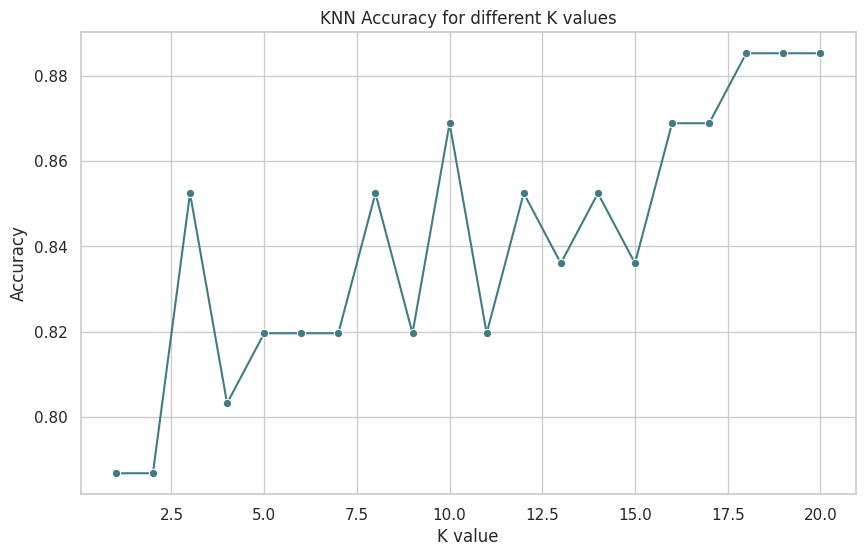

In [14]:
# Plotting the accuracy vs. k using seaborn
best_k_seaborn, best_accuracy_seaborn = plot_accuracy_vs_k_seaborn(20)



In [15]:
best_k_seaborn, best_accuracy_seaborn

(18.0, 0.8852459016393442)

In [16]:
# Example: Train and evaluate with k=18

knn_model_k, accuracy_k, classification_report_k = train_knn_with_k(20)

print(accuracy_k)
print(classification_report_k)

0.8852459016393442
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        21
           1       0.90      0.93      0.91        40

    accuracy                           0.89        61
   macro avg       0.88      0.87      0.87        61
weighted avg       0.88      0.89      0.88        61



In [17]:
# Predict function to use the best KNN model (k=20)

def predict_heart_disease_with_best_k(input_data):
    # Scale the input data
    input_data_scaled = scaler.transform([input_data])

    # Predict using the trained model with the best k value
    prediction = knn_model_k.predict(input_data_scaled)

    # Return the result
    return "Heart Disease" if prediction[0] == 1 else "No Heart Disease"

# Example usage:
# To predict, you would pass a list of values in the order of the features:
# predict_heart_disease_with_best_k([age, sex, cp, trtbps, chol, fbs, restecg, thalachh, exng, oldpeak, slp, caa, thall])

# Sample input for testing with the best KNN model
sample_input = [62, 1, 3, 130, 123, 0, 1, 97, 0, 1.2, 1, 1, 2]
predict_heart_disease_with_best_k(sample_input)


'No Heart Disease'